## <p style="text-align:right;">Tropical Weather Systems</p>
<p style="text-align:right;">Departement Meteorology, University Of Reading</p>
<p style="text-align:right;">February 26, 2024</p>
<p style="text-align:right;">(28818273)</p>


# Question 1
### (a) Coriolis Parameter
Calculate the Coriolis parameter at 5°S, 5°N, and 10°N.

We can solve this problem by using coriolis equation

$$f = 2 \Omega sin (\phi)$$

where:
- $\Omega = 7.292 \cdot 10^{-5}$ rad/s,
- $(\phi)$ = latitude on radians

So,
- $f (5N) = 2 \Omega sin (5)$
- $f (5S) = 2 \Omega sin (-5)$
- $f (10N) = 2 \Omega sin (10)$


In [34]:
import numpy as np

def coriolis_parameter(phi):
    omega = 7.292 * 10**-5  # rad / s
    f = 2 * omega * np.sin(np.radians(phi))  # rad / s
    return f

# Calculate Coriolis parameter at 5°S, 5°N, and 10°N
f_5S = coriolis_parameter(-5)
f_5N = coriolis_parameter(5)
f_10N = coriolis_parameter(10)

# Print the results
print(f'Coriolis parameter at 5°S: {f_5S:.2e} rad/s')
print(f'Coriolis parameter at 5°N: {f_5N:.2e} rad/s')
print(f'Coriolis parameter at 10°N: {f_10N:.2e} rad/s')


Coriolis parameter at 5°S: -1.27e-05 rad/s
Coriolis parameter at 5°N: 1.27e-05 rad/s
Coriolis parameter at 10°N: 2.53e-05 rad/s


### (b) Equatorial beta-plane approximation
The equatorial beta-plane approximation, where the Coriolis force varies linearly with distance from the equator, is a commonly used simplification in tropical meteorology. To assess the accuracy of this approximation, we need to compare the calculated Coriolis values using this approximation with the actual values. The percentage error can be computed using the formula:

$$\text{Percentage Error} = \frac{|f - f_{\text{approx}}|}{|f|} \times 100\%$$

Where $f approx$ is the Coriolis value calculated using the equatorial beta-plane approximation, and $f$ is the actual Coriolis value.

First, let's calculate the Coriolis value using the equatorial beta-plane approximation formula:

$$f_{\text{approx}} = \beta \cdot y$$

 - $\beta = 2.3 \cdot 10^{-11}$ m/s, 
- $y = \phi \times x$. 
- $x = 111$ km (assume that the distance between 1 $^o$ latitudes is 111 km).


In [35]:
def beta_approx(phi):
    beta = 2.3 * 10**-11    # m/s
    y = phi * 111 * 10**3   # m
    f_approx = beta * y     # rad/s
    return f_approx

def percent_error(phi):
    if phi == 0:
        return np.nan
    percent = abs((coriolis_parameter(phi) - beta_approx(phi)) \
              / coriolis_parameter(phi))  * 100
    return percent

print(f'Percentage error 5 S:  {percent_error(-5):.3f} %')
print(f'Percentage error 5 N:  {percent_error(5):.3f} %')
print(f'Percentage error 10 N: {percent_error(10):.3f} %')

Percentage error 5 S:  0.426 %
Percentage error 5 N:  0.426 %
Percentage error 10 N: 0.810 %


##### (c) Calculate beta plane approximation reaches 5%

o determine when the error in $f$ due to the beta-plane approximation reaches 5%, an analysis of error values across latitudes from the equator to the poles (0 to 90 degrees latitude) was conducted. It was observed that error values exhibit an exponential increase, with minimal errors occurring around the equatorial region, approaching nearly zero.

Nearest Latitude: 30 N
Nearest Error rounded: 5.033 %


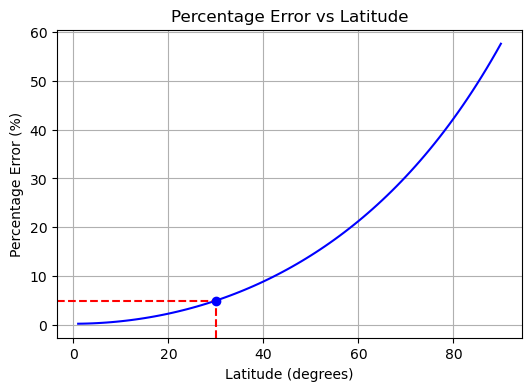

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def beta_approx(phi):
    beta = 2.3 * 10**-11    # (m s)^-1
    y = phi * 111 * 10**3   # m
    f_approx = beta * y     # (rad / s)
    return f_approx

def percent_error(phi):
    if phi == 0:
        return np.nan
    percent = abs((coriolis_parameter(phi) - beta_approx(phi)) \
              / coriolis_parameter(phi))  * 100
    return percent

def error_lat(target):
    lat = np.arange(0, 90, 1)
    errors = np.array([percent_error(phi) for phi in lat])
    nearest_error = np.nanargmin(abs(errors - target))
    nearest_lat = lat[nearest_error]
    nearest_err = round(errors[nearest_error], 3)  # round the result
    return nearest_lat, nearest_err

# Calculate the nearest latitude and its error
nearest_lat, nearest_err = error_lat(5)
print(f'Nearest Latitude: {nearest_lat} N')
print(f'Nearest Error rounded: {nearest_err} %')

# Generate values for latitude from 0 to 90
latitudes = np.arange(0, 91, 1)

# Calculate percentage error for each latitude from 0 to 90
errors = [percent_error(phi) for phi in latitudes]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(latitudes, errors, color='blue')
plt.scatter(nearest_lat, nearest_err, color='blue', marker='o')
plt.axhline(y=nearest_err, xmin=0, xmax=nearest_lat/90, color='red', linestyle='--')
plt.axvline(x=nearest_lat, ymin=0, ymax=nearest_err/48, color='red', linestyle='--')
plt.title('Percentage Error vs Latitude')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Percentage Error (%)')
plt.grid(True)
plt.show()



##### (d)

**(i)** Based on the analysis of the calculated percentage errors associated with the equatorial beta-plane approximation, insights into its suitability for examining equatorially trapped waves emerge. When these percentage errors exhibit nominal magnitudes, it indicates that the beta-plane approximation yields reasonably precise outcomes, thereby rendering it conducive for investigating equatorially trapped wave phenomena. Conversely, instances where the percentage errors manifest considerable magnitudes imply potential inadequacies in the beta-plane approximation's ability to capture the intricacies of equatorially trapped waves faithfully.
Hence, the extent of the approximation's appropriateness for scrutinizing equatorially trapped waves can be discerned through a meticulous examination of the percentage errors stemming from the comparison between the beta-plane approximation and actual Coriolis parameter values. Lower percentage errors denote heightened suitability, signifying a closer alignment between the approximation and the actual dynamics of equatorially trapped waves. Conversely, elevated percentage errors signify inherent limitations in the beta-plane approximation's efficacy for such analytical pursuits.

**(ii)** Equatorially trapped Kelvin waves and equatorial Rossby waves are significant in the Earth's oceans and atmosphere, particularly in the equatorial region. These waves are greatly influenced by the Earth's rotation and the variation of the Coriolis effect with latitude. A balance between the pressure gradient and Coriolis forces characterizes the equatorial Kelvin waves. In contrast, equatorial Rossby waves result from the conservation of vorticity and the variation of the Coriolis force with latitude.

**Equatorial Kelvin Waves:** In reality, these waves depend crucially on the variation of the Coriolis parameter with latitude since $f = 2Ω.sin.(latitude)$, where Ω is the Earth's angular velocity). This variation causes the waves to be trapped near the equator. If an f-plane approximation (constant $𝑓$) is used, the mechanism that confines Kelvin waves to the equatorial region would be absent. This means that equatorial Kelvin waves' characteristic structure and propagation would be significantly altered or might not form at all.

**Equatorial Rossby Waves:** Similar to Kelvin waves, the latitudinal variation of the Coriolis parameter also influences equatorial Rossby waves. These waves arise due to the conservation of potential vorticity, which includes the effects of the changing Coriolis parameter with latitude. Under an f-plane approximation, the lack of variation in the Coriolis parameter would mean that the typical dispersion relation and characteristics of equatorial Rossby waves would be fundamentally changed. The waves might not exhibit their usual westward propagation or could be altered to be unrecognizable as equatorial Rossby waves.
    In summary, using an f-plane approximation for studying equatorial dynamics would significantly alter or negate the formation and characteristics of equatorially trapped Kelvin and Rossby waves since both these wave types crucially depend on the latitudinal variation of the Coriolis parameter. This feature is absent in the f-plane approximation.

**(iii)**  The Held-Hou model of the Hadley Circulation is a simplified model that describes the structure of the Hadley Cell in the atmosphere. It relies on certain assumptions and approximations, including the beta-plane approximation. Using the beta-plane approximation, the Held-Hou model is likely to provide a good representation of the Hadley Circulation in the tropics. However, the model's accuracy might decrease as one moves towards higher latitudes, where the Coriolis parameter changes more significantly. Its use of the beta-plane approximation makes it a suitable and accurate model for studying the Hadley Circulation, especially in the equatorial and near-equatorial regions.


.




### Question 2
##### (a) rainfall increase in the future

Rainfall in India region are depend on monsson where during summer monsoon moisture transported from a prevailing south westerly flow across the northern Indian Ocean like given on a figure. Where on the figure show mousture transport during JJA period, like J Webster and J Fasullo do in their paper.


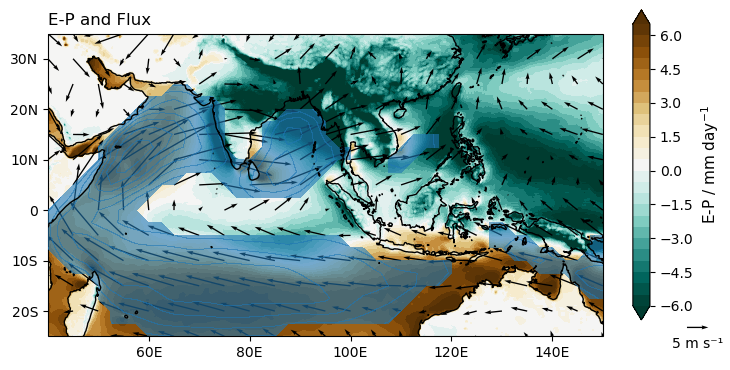

Figure 1. Annual mean Evaporation-Precipitation, if precipitation is higher than evaporation
(green) and the otherwise (brown) at JJA (June, July, August) periods. The vectors indicate wind direction and speed
in m/s, The blue color indicates the distribution of the mean vertically integrated moisture transport
above $3x10^{-2}$kgm/s. Produce with data from ERA-5 (1980-2010)

To complite this problems we will use Clausius-Claperyon Equation:

$${es} = \exp \left (  \frac{L}{R_v} \cdot (\frac{1}{T_0} - \frac{1}{T_1})\right )$$

where :
- $L = 2.5 \cdot 10^6 J/kg,$
- $R_v = 461.5 \frac{J}{kg \cdot K}$
- $Assume T_0 = 298.15 K $
- $Indian Ocean's temperature T_1= 300.15 K. $
- $Indian Ocean's temperature T_2= 302.65 K. $

In this calculation we use 300.15 K because as average SST during summer monsoon in Hindia ocean are around $27^0$ Celcius base on (2) and (3) and $25^0$ Celcius for $T_0$

and the Percentage of increasing, will be count:
$$\frac{es_2 - es_1}{es_1} \cdot 100$$

where at the end of calculation we can found rainfall will be increaesed around 16.077 % and we make another simulation if temperatur will be increased to 5.0 Kelvin in Figure. 2. It show temperatur will enhance the % of precipitation in linier

In [15]:
def CC_eq(T1, diff):
    # Constants
    L = 2.5 * 10**6     # J/kg
    Rv = 461.5          # J/(Kg K)
    T0 = 298.15         # K
    
    # Temperature calculation
    T2 = T1 + 2.5       # K
    
    # Saturation vapor pressure calculation
    e_es1 = np.exp(L / Rv * ((1/T0) - (1/T1)))
    e_es2 = np.exp(L / Rv * ((1/T0) - (1/T2)))
    
    # Percentage increase calculation
    percent_inc = ((e_es2 - e_es1) / e_es1) * 100
        
    # Return values
    return e_es1, e_es2, diff, percent_inc
 
# Test the function
e_es1, e_es2, diff, percent_inc = CC_eq(300.15, 2.5)
print(f'Difference temperature {diff} C, percentage increase: {percent_inc:.3f} %')



Difference temperature 2.5 C, percentage increase: 16.077 %


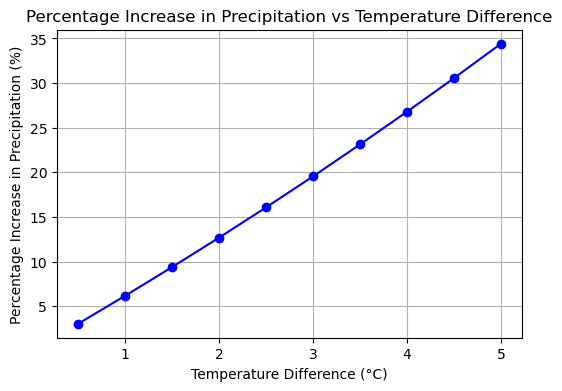

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def CC_eq(T1, diff):
    # Constants
    L = 2.5 * 10**6     # J/kg
    Rv = 461.5          # J/(Kg K)
    T0 = 298.15         # K
    
    # Temperature calculation
    T2 = T1 + diff       # K
    
    # Saturation vapor pressure calculation
    e_es1 = np.exp(L / Rv * ((1/T0) - (1/T1)))
    e_es2 = np.exp(L / Rv * ((1/T0) - (1/T2)))
    
    # Percentage increase calculation
    percent_inc = ((e_es2 - e_es1) / e_es1) * 100
    
    # Return values
    return percent_inc

# Generate temperature differences from 0.5 to 5.0 with step 0.5
temp_diffs = np.arange(0.5, 5.1, 0.5)

# Calculate percentage increase in precipitation for each temperature difference
perc_incs = [CC_eq(300.15, diff) for diff in temp_diffs]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(temp_diffs, perc_incs, marker='o', color='b', linestyle='-')
plt.title('Percentage Increase in Precipitation vs Temperature Difference')
plt.xlabel('Temperature Difference (°C)')
plt.ylabel('Percentage Increase in Precipitation (%)')
plt.grid(True)
plt.show()


Figure 2. percentage of precipitation base on delta temperature between T1 and T2

##### (b)  equivalent potential temperature $\theta_e$ and saturation equivalent potential temperature $\theta_es$
**(i) equivalent potential temperature $\theta_e$:**
Equivalent potential temperature is an air parcel's temperature when the water vapor within it condenses, releasing latent heat, and the air parcel is brought to standard reference pressure adiabatically. In other words, it is the temperature that the air would have if all the moisture within it were condensed and latent heat were released, but the air parcel remained at the same pressure as the atmospheric pressure at the reference level.

**Saturated equivalent potential temperature $\theta_es$:**
Saturated equivalent potential temperature is the temperature achieved by an air parcel through the condensation of saturated water vapor inside it, releasing latent heat, and subsequent adiabatic adjustment to standard reference pressure.

**(ii)** Calculate the values of $\theta_e$ 

we will compare calculation for $\theta_e$ from manual (tephigram) and from  equation where all paramater given are, 
- (A) Temperature 25 $^oC$ and mixing ratio 17 $\frac{g}{kg}$; 
- (B) Temperature 40 $^oC$ and mixing ratio 7 $\frac{g}{kg}$

$$\theta_e = \theta + \left ( \frac{Lr}{c_p} \right ) \left ( \frac{p_0}{p}\right )^{\frac{R_d}{c_p}}$$

where potential temperature $\theta$:
$$\theta = T \left ( \frac{p_0}{p}\right )^{\frac{R_d}{c_p}} $$

Where:

- $θₑ$ is the saturated equivalent potential temperature.
- $θ$ is the potential temperature.
- $L$ is the latent heat of vaporization.
- $r$ is the mixing ratio.
- $cₚ$ is the specific heat at constant pressure.
- $p₀$ is the reference pressure.
- $p$ is the current pressure.
- $R_d$ is the gas constant for dry air.
- $T$ is Temperatur

An addition that would facilitate personal comprehension is the inclusion of an equation for calculating $\theta_e$ , as errors may occur during the process of drawing lines on the tephrogram.

In [1]:
def eq_pot_temp(T, rv):
    L = 2.5 * 10**6                 # J/kg
    Cp = 1004                       # J / (kg K)
    po = 1000 * 100                 # Pa
    p = 1000 * 100                  # Pa
    p_avg = (1013 + 100) / 2 * 100  # Pa
    rv_new = rv * 10**-3            # kg/kg
    Tk = 273.15 + T                 # K
    Rd = 287                        # J / (kg K)
    pot = Tk * ((po / p)**(Rd / Cp))
    eq_pot = pot + (L * rv_new / Cp) * ((po / p_avg)**(Rd / Cp)) - 273.15
    return T, rv_new, eq_pot

T, rv_new, eq_pot = eq_pot_temp(25, 17)
print(f'Temperature: {T} C, Mixing ratio: {rv_new} \nEquivalent Potential Temperature: {eq_pot:.3f} C')
T, rv_new, eq_pot = eq_pot_temp(40, 7)
print(f'Temperature: {T} C, Mixing ratio: {rv_new} \nEquivalent Potential Temperature: {eq_pot:.3f} C')


Temperature: 25 C, Mixing ratio: 0.017 
Equivalent Potential Temperature: 75.051 C
Temperature: 40 C, Mixing ratio: 0.007 
Equivalent Potential Temperature: 60.609 C


<img src="tepigram.jpeg" style="width:400px;height:500px"/>

Figure 3. Tephigram to calculate the θₑ

**(iii) θₑ in the ocean** 

Generally, latent heat in tropical regions is higher compared to mid-latitude and polar areas, facilitating easier vaporization. In tropical regions characterized by elevated surface temperatures, this results in an elevated baseline for θₑ. Elevated temperatures augment θₑ as warmer air can accommodate more energy. Furthermore, heightened humidity increases latent heat availability for release, thereby amplifying θₑ. The substantial humidity in tropical regions, attributed to evaporation from warm ocean surfaces, significantly influences the spectrum of θₑ values. Both temperature and humidity are pivotal in elucidating θₑ variations, each exerting complementary roles. In the tropics, elevated temperatures establish a robust baseline for θₑ, while the extensive ocean surfaces contribute substantially to θₑ enhancement by imparting latent heat to the atmosphere. This symbiosis elucidates why tropical regions often exhibit intense weather phenomena, such as hurricanes and thunderstorms, driven by elevated θₑ values (4)(5)(6).

As for differences between ocean and land, in general, θₑ in the ocean is higher due to its higher latent heat content. However, during certain periods, such as monsoon seasons, specific terrestrial locations exhibit relatively high θₑ compared to their annual averages. For instance, during the JJA period, parts of India experience elevated θₑ, and during the DJF period in the Maritime Continent and Northern Australia.

In Figure 4, we can see the distribution of θₑ over a small region during the DJF and JJA periods. Due to the influence of wind during the monsoon, the pattern of θₑ can change both over land and the ocean.

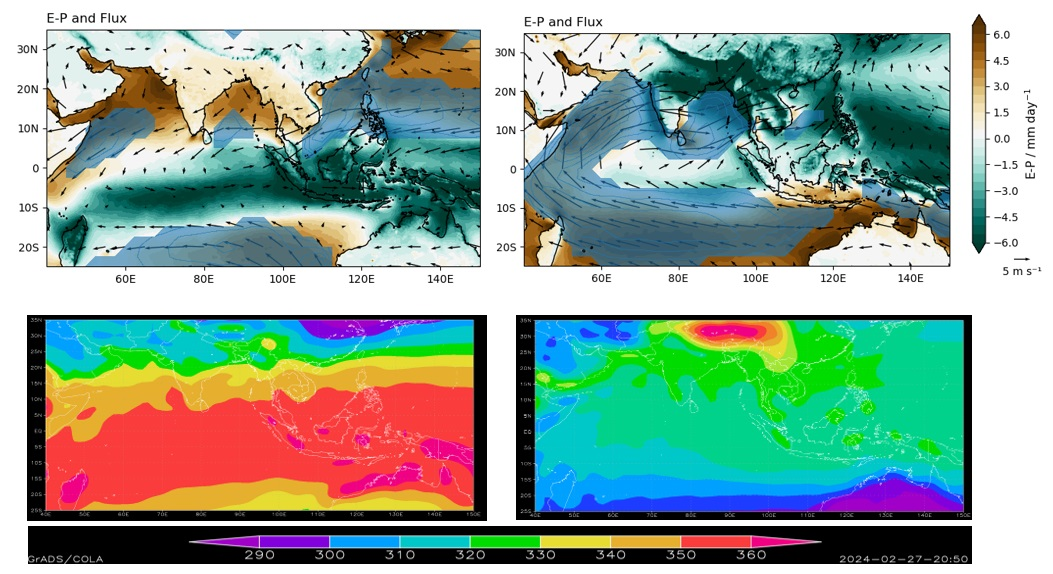

Figure 4 illustrates the comparison between two panels. The upper panel replicates the content of Figure 1, while the lower panel represents θₑ distribution. Left section corresponds to the DJF period, whereas the right section pertains to the JJA period. The upper panel contains Evaporation-Precipitation data sourced from ERA5 for the 1980-2010 period, alongside wind data from NOAA's Reanalysis II covering the same timeframe. As for the lower panel, it presents plotted results derived from Reanalysis II data for θₑ during periode 2010-2015, accessible at https://psl.noaa.gov/data/composites/nssl/day/.

### Question 3
##### (a) Amplitude variation in geopotential height

$\Delta Z = \frac{g}{RT} \ln \left( \frac{P_2}{P_1} \right)$

Where:
    
- $ΔZ$ = the difference in geopotential heights between two pressure levels,
- $R$ = the gas constant for dry air,
- $T$ = the temperature,
- $g$ = the acceleration due to gravity,
- $P_1 and P_2$ = are the surface pressures at the two pressure levels.


$$\check{u}(y)=\widehat{\Phi}(y) / c$$
where $\check{u}(y)$ is zonal wind, $\widehat{\Phi}(y)$ is geopotential, and phase speed is $c$.

$$Z = \widehat{\Phi} / g$$
where $Z$ is geopotential height.

To find surface pressure, we assume the atmosphere is hydrostatic balance $\frac{dp}{dz}=-\rho g$. 

Then rearrange to be $P_1 = P_0 e^{\frac{-g Z}{R T}}$

Where we use $R=287 \frac{J}{kg K}$; Pressure reference ($P_0$) = $1000 hPa$ with Temperature ($T=25 ^oC$).

Using the hydrostatic balance assumption and a reference pressure of 1000 hPa, we estimate the corresponding surface pressure changes. For the -10 m/s zonal wind anomaly, the surface pressure increases to approximately 1009.39 hPa, while for the +10 m/s zonal wind anomaly, the surface pressure decreases to approximately 990.69 hPa.

These estimations suggest significant variations in surface pressure due to zonal wind anomalies associated with the dry equatorially trapped Kelvin wave. The direction of the anomaly determines whether the surface pressure increases or decreases relative to the reference pressure of 1000 hPa. This analysis assumes an idealized atmosphere in hydrostatic balance, with constant temperature at 25°C.



In [2]:
from math import exp

# Constants
g = 9.81  # m/s^2
R = 287  # J/(kg*K)
T = 25 + 273.15  # Temperature in Kelvin
P0 = 1000  # hPa, reference pressure
c = 80  # m/s, phase speed

# Convert reference pressure to Pa for calculation
P0_Pa = P0 * 100  # 1 hPa = 100 Pa

# Zonal wind anomalies (m/s)
u_prime_min = -10
u_prime_max = 10

# Calculate geopotential height anomalies (Z) for min and max wind anomalies
# Z = u_prime * c / g
Z_min = u_prime_min * c / g
Z_max = u_prime_max * c / g

# Calculate surface pressure variations for min and max geopotential height anomalies
P1_min = P0_Pa * exp(-g * Z_min / (R * T))
P1_max = P0_Pa * exp(-g * Z_max / (R * T))

# Convert calculated pressures back to hPa
P1_min_hPa = P1_min / 100
P1_max_hPa = P1_max / 100

Z_min, Z_max, P1_min_hPa, P1_max_hPa


(-81.54943934760448, 81.54943934760448, 1009.3930147811452, 990.6943929236702)

##### (b) Wind and surface pressure amplitude
Latitudinal depencence of the kelvin wave
$$\check{u}(y)=u_0 e^{\frac{-\beta y^2}{2c}}$$

where 

$\beta = 2.3 \cdot 10^{-11}$ m/s, 

$y = \phi \times x$. $x = 111$ km (assume that the distance between 1 $^o$ latitudes is 111 km).

In [9]:
def pressure_amplitude(phi):
    g = 9.8                 # m / s^2
    R = 287                 # J / (kg K) 
    p0 = 100000             # Pa
    T = 25                  # C
    Tk = 273.15 + T         # K
    beta = 2.3 * 10**-11    # (m s)^-1
    y = phi * 111 * 10**3   # m
    c = 80                  # m / s
    u_0 = 10                # m / s
    u = u_0 * np.exp(-beta * y**2 / (2 * c))
    print(f'Wind amplitude: {u:.2f} m /s')
    
    geop = c * u            # m^2 / s^2
    Z = geop / g            # m
    p1 = p0 * np.exp(-g * (2 * Z)/(R * Tk))
    print(f'Surface pressure amplitude: {p1/100:.2f} hPa')
    return

pressure_amplitude(12)

Wind amplitude: 7.75 m /s
Surface pressure amplitude: 985.62 hPa


##### (c) Matsuno-Gill response for winds and pressure in the lower troposphere

Zonal Phase Speed Differences: The explanation highlights that Kelvin waves have a faster easterly phase speed compared to Rossby waves. This is in line with the information given in the prompt that the fastest equatorially trapped Kelvin wave's zonal phase speed is three times that of the equatorial Rossby wave. The faster phase speed of Kelvin waves explains their ability to extend farther east from the heating source.

Propagation Characteristics: The explanation distinguishes between the eastward propagation of Kelvin waves and the westward propagation of Rossby waves. It correctly identifies how these differing propagation characteristics lead to distinct wind and pressure patterns in the lower troposphere. Kelvin waves are associated with low-level westerly winds and low-pressure anomalies near and to the east of the heating source, while Rossby waves generate cyclonic circulations and high-pressure anomalies to the west.

Pressure Anomalies and Wind Field Symmetry/Asymmetry: The discussion on pressure anomalies and wind field symmetry/asymmetry reflects the impacts of Kelvin and Rossby waves. Kelvin waves produce symmetric wind fields and low-pressure anomalies extending eastward, whereas Rossby waves result in asymmetric wind fields with high-pressure anomalies further west. This distinction is crucial for understanding the overall wind and pressure patterns in response to equatorial heating.

Combined Matsuno-Gill Response: The explanation concludes by describing the combined effect of Kelvin and Rossby waves as illustrated in the Matsuno-Gill model. It emphasizes the interplay between these waves in shaping atmospheric circulation in response to tropical heating, which is precisely what the prompt asks for.

### Question 4
##### (a) Present and Future hadly Circulation

The weakening of the pole-to-equator temperature gradient $(ΔT)$ due to global warming is a significant factor that can influence Earth's Hadley circulation.

**1. Shift in the Hadley Cell Edge:** A weaker $ΔT$ can result in a poleward shift of the Hadley cell edges. Since the gradient drives the thermal circulation, a reduction would likely expand the Hadley cell's latitudinal reach.
    $Y = \sqrt{\frac{3 \cdot \omega^2 \cdot \theta}{5 \cdot \delta\theta \cdot g \cdot H}}$

**2. Reduced Circulation Strength:** The strength of the Hadley circulation is directly related to the temperature gradient. A weaker gradient would reduce the overall convective strength, leading to a less vigorous circulation.

**3. Slower Tropical Easterlies:** The speed of the trade winds could be affected, potentially slowing down as the temperature gradient decreases.
    
Other Relevant Input Parameters That Might Change:
        
**1.** The **expansion** of the Hadley cells could result in a more zonal and less meridional flow pattern, with potential implications for mid-latitude weather systems.

**2.** Changes in the **drag coefficien**t and **latent heat** release could affect surface wind patterns and the efficiency of energy transport from the equator towards the poles.

**3.** Alterations in **albedo** due to changes in ice cover could create localized heating effects, potentially intensifying cyclonic activity.

**4.** An **tropopause height** could allow for more vigorous convection within the tropics, possibly leading to more extreme weather events.

**5.** **Moist Processes (e.g., Latent Heat Release):** The moisture content of the atmosphere is expected to increase due to higher temperatures, leading to more significant latent heat release during condensation. This would add energy to the system and potentially intensify local convection currents within the Hadley circulation.
    
With the simple Held-Hou model, we attempt to simulate the temperature gradient between the pole and the equator according to climate change. We use a present value of $\delta \theta$ as 60 Kelvin and project a future scenario with $\delta \theta$ at 50 Kelvin. The result shows a change in the Latitude Edge of 0.73° and a percentage change in Circulation Strength of -16.67%.

C:\Users\ck818273\AppData\Local\Temp\ipykernel_12712\1210966715.py:42: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(np.sqrt(2 * Ω * a / (g * delta_T))))


Current Hadley Cell Edge Latitude: 81.64°, Strength: 2.00
Future Hadley Cell Edge Latitude: 82.38°, Strength: 1.67
Difference in Latitude Edge: 0.73°
Percentage Change in Circulation Strength: -16.67%


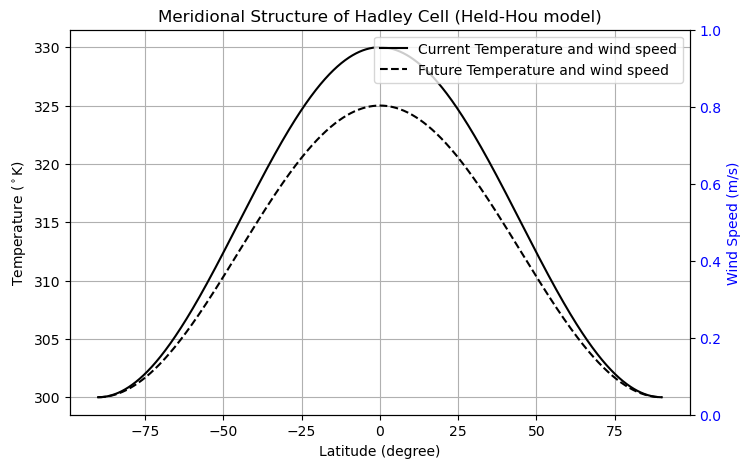

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def held_hou_model(delta_T, rotation_rate_factor=1.0, drag_coefficient_factor=1.0):
    """
    Simplified Held-Hou model for Hadley circulation.
    
    Parameters:
    - delta_T: Equator-to-pole temperature difference (K)
    - rotation_rate_factor: Factor to adjust Earth's rotation rate (Ω)
    - drag_coefficient_factor: Factor to adjust the surface drag coefficient
    
    Returns:
    - latitude_edge: Latitude of the Hadley cell edge (degrees)
    - circulation_strength: Relative strength of the Hadley circulation
    """
    # Constants
    Ω = 7.2921e-5 * rotation_rate_factor       # Earth's rotation rate, rad/s
    a = 6.371e6                                # Earth's radius, m
    g = 9.81                                   # Acceleration due to gravity, m/s^2
    
    # Simplified calculations
    thermal_forcing = delta_T / 30  # Arbitrary scaling for educational purposes
    circulation_strength = thermal_forcing * drag_coefficient_factor
    latitude_edge = np.rad2deg(np.arccos(np.sqrt(thermal_forcing / (2 * Ω * a / g))))
    
    return latitude_edge, circulation_strength

# Define the function for the potential temperature profile
def theta(lat, delta_T):
    return 300 + (delta_T/2) * np.cos(np.deg2rad(lat))**2

# Define the function to calculate the wind speed profile
def wind_speed(lat, delta_T):
    return 10 + 0.2 * delta_T * np.cos(np.deg2rad(lat))**2

# Define the function to calculate the Held-Hou cell edge
def held_hou_cell_edge(delta_T):
    Ω = 7.2921e-5  # Earth's rotation rate, rad/s
    a = 6.371e6  # Earth's radius, m
    g = 9.81  # Acceleration due to gravity, m/s^2
    return np.rad2deg(np.arccos(np.sqrt(2 * Ω * a / (g * delta_T))))

# Example scenario: Reduced temperature gradient due to global warming
delta_T_current = 60  # Current estimated equator-to-pole temperature difference in K
delta_T_future = 50  # Future scenario with reduced temperature difference in K

# Calculate Held-Hou model results for current and future scenarios
latitude_edge_current, circulation_strength_current = held_hou_model(delta_T_current)
latitude_edge_future, circulation_strength_future = held_hou_model(delta_T_future)

# Create latitude array
latitudes = np.linspace(-90, 90, 1000)

# Calculate potential temperature profiles
theta_current = theta(latitudes, delta_T_current)
theta_future = theta(latitudes, delta_T_future)

# Calculate wind speed profiles
wind_speed_current = wind_speed(latitudes, delta_T_current)
wind_speed_future = wind_speed(latitudes, delta_T_future)

# Calculate cell edges
phi_HC_current = held_hou_cell_edge(delta_T_current)
phi_HC_future = held_hou_cell_edge(delta_T_future)

# Calculate percentage difference in latitude edge and circulation strength
Difference_latitude = latitude_edge_future - latitude_edge_current
circulation_strength_precent = ((circulation_strength_future - circulation_strength_current) / circulation_strength_current) * 100

# Display the results
print(f"Current Hadley Cell Edge Latitude: {latitude_edge_current:.2f}°, Strength: {circulation_strength_current:.2f}")
print(f"Future Hadley Cell Edge Latitude: {latitude_edge_future:.2f}°, Strength: {circulation_strength_future:.2f}")
print(f"Difference in Latitude Edge: {Difference_latitude:.2f}°")
print(f"Percentage Change in Circulation Strength: {circulation_strength_precent:.2f}%")

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot temperature profile
ax1.plot(latitudes, theta_current, label='Current Temperature and wind speed', color='black')
ax1.plot(latitudes, theta_future, label='Future Temperature and wind speed', color='black', linestyle='--')
ax1.set_xlabel('Latitude (degree)')
ax1.set_ylabel(r'Temperature ($^\circ$K)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot wind speed profile
ax2 = ax1.twinx()  
ax2.set_ylabel('Wind Speed (m/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Fill under the curve for current temperature
ax1.fill_between(latitudes, theta_current, 300, where=(latitudes >= -phi_HC_current) & (latitudes <= phi_HC_current), color='blue', alpha=0.3)

# Fill under the curve for future temperature
ax1.fill_between(latitudes, theta_future, 300, where=(latitudes >= -phi_HC_future) & (latitudes <= phi_HC_future), color='red', alpha=0.3)

# Cell edges
ax1.axvline(x=phi_HC_current, color='blue', linestyle='--', alpha=0.5)
ax1.axvline(x=-phi_HC_current, color='blue', linestyle='--', alpha=0.5)
ax1.axvline(x=phi_HC_future, color='red', linestyle='--', alpha=0.5)
ax1.axvline(x=-phi_HC_future, color='red', linestyle='--', alpha=0.5)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Title
plt.title('Meridional Structure of Hadley Cell (Held-Hou model)')

# Grid
ax1.grid(True)

plt.show()


##### (b) angular momentum conservation
Assuming angular momentum conservation and a symmetric distribution of heating around the equator, we can estimate the upper-level zonal wind at 5°N, 10°N, and 25°N using the Held-Hou model. We'll use the equation derived from angular momentum conservation:

$$u = \frac{\Omega a}{cos \phi} \left [ sin^2 \phi \right ]$$

Where:

- $u(ϕ)$ is the zonal wind speed at latitude ϕ.

- $Ω$ is the angular velocity of Earth's rotation.

- $a$ is the radius of the Earth.

- $ϕ$ is the latitude in radians.

where 

$\Omega = 7.292 \cdot 10^{-5}$ rad/s, 

$a = 6371$ km.

In [29]:
def ang_momentum(phi):
    omega = 7.292 * 10**-5
    a = 6371e3
    u = omega * a / np.cos(np.radians(phi)) * np.sin(np.radians(phi))**2
    return phi, u

# Calculate zonal wind speed at different latitudes
phi, um = ang_momentum(5)
print(f'Latitude  {phi} N, zonal wind: {um:.3f} m/s')

phi, um = ang_momentum(10)
print(f'Latitude {phi} N, zonal wind: {um:.3f} m/s')

phi, um = ang_momentum(25)
print(f'Latitude {phi} N, zonal wind: {um:.3f} m/s')

Latitude  5 N, zonal wind: 3.542 m/s
Latitude 10 N, zonal wind: 14.225 m/s
Latitude 25 N, zonal wind: 91.554 m/s


##### (c) Wind Speed at confluence zone.

To clarify the calculation of angular momentum $(M)$ at the latitude of the ITCZ (12°N):

$M = a \cdot \cos(\phi_{\text{ITCZ}}) \cdot (u_{\text{ITCZ}} + \Omega \cdot a \cdot \cos(\phi_{\text{ITCZ}}))$
    
Where:
- $M$ is the angular momentum.
- $a$ is the radius of the Earth.
- $ϕITCZ$ is the latitude of the ITCZ (12°N).
- $uITCZ$ is the zonal wind speed at the ITCZ.
- $Ω$ is the angular velocity of Earth's rotation.

At the ITCZ, we assume that the zonal wind speed $(u ITCZ)$ is zero because the wind speed is generally low in the confluence zone. The air rising at the ITCZ would have the Earth's rotational velocity at that latitude.
We calculate the angular momentum $(M)$ considering both the zonal wind speed $(uITCZ)$ and the Earth's rotational velocity at the latitude of the ITCZ.

Where as a final resuf we found 9.93 m/s.

In [46]:
import numpy as np

def zonal_wind_equator():
    # Constants
    omega = 7.292 * 10**-5  # Earth's angular velocity in rad/s
    a = 6371e3  # Earth's radius in meters
    phi_confluence = np.radians(12)  # Latitude of the confluence zone in radians

    # Zonal wind equation considering off-equatorial heating
    u_equator = omega * a * (np.cos(phi_confluence) - np.cos(phi_confluence)**2)

    return u_equator

# Calculate zonal wind at the equator
u_equator = zonal_wind_equator()

# Print the result
print(f"Zonal Wind at the Equator: {u_equator:.2f} m/s")


Zonal Wind at the Equator: 9.93 m/s


##### (d) asymmetric Held-Hou model

In the symmetric case, the heating is evenly distributed around the equator, leading to a relatively straightforward, symmetric Hadley circulation with air rising at the equator and sinking at higher latitudes in both hemispheres. This pattern promotes a consistent, year-round mass transport that is the same in both hemispheres.

However, when asymmetric heating is introduced, such as during solstices, the solar heating is more intense in one hemisphere than the other, creating a seasonal imbalance. This imbalance shifts the zones of rising and sinking air, causing the ITCZ and associated circulation patterns to migrate toward the warmer hemisphere. Consequently, this leads to a more complex, seasonally varying mass transport that differs between the hemispheres and changes throughout the year. The shifts in the ITCZ and other circulation features like monsoons are direct responses to these asymmetric heating patterns, which are not captured in a model with symmetric heating. (7)(8)(9)

## References

Webster, Peter & Fasullo, John. (2003). Monsoon: Dynamical theory. Encyclopedia of Atmospheric Sciences. 1370-1386. 10.1016/B0-12-227090-8/00236-0.
    
Sein, D.V., Martyanov, S.D., Dvornikov, A.Y. et al. Future climate change in the Northern Indian Ocean as simulated with a high-resolution regional earth system model. Clim Dyn 62, 911–932 (2024). https://doi.org/10.1007/s00382-023-06939-9
    
Wenegrat, J. O., Bonanno, E., Rack, U., & Gebbie, G. (2022). A century of observed temperature change in the Indian Ocean. Geophysical Research Letters, 49, e2022GL098217. https://doi.org/10.1029/2022GL098217
    
Dai, Y., Li, Q., Liu, X. et al. A Lagrangian Trajectory Analysis of Azimuthally Asymmetric Equivalent Potential Temperature in the Outer Core of Sheared Tropical Cyclones. Adv. Atmos. Sci. 40, 1689–1706 (2023). https://doi.org/10.1007/s00376-023-2245-0
    
Kowaleski, Alex & Evans, Jenni. (2015). Thermodynamic Observations and Flux Calculations of the Tropical Cyclone Surface Layer within the Context of Potential Intensity. Weather and Forecasting. 30. 150731131449002. 10.1175/WAF-D-14-00162.1. 

Dolling, K. P., and G. M. Barnes, 2012: The Creation of a High Equivalent Potential Temperature Reservoir in Tropical Storm Humberto (2001) and Its Possible Role in Storm Deepening. Mon. Wea. Rev., 140, 492–505, https://doi.org/10.1175/MWR-D-11-00068.1.
        
Guo, Y., J. Li, J. Feng, F. Xie, C. Sun, and J. Zheng, 2016: The Multidecadal Variability of the Asymmetric Mode of the Boreal Autumn Hadley Circulation and Its Link to the Atlantic Multidecadal Oscillation. J. Climate, 29, 5625–5641, https://doi.org/10.1175/JCLI-D-15-0025.1.
                
Hoskins, B. J. and Yang, G. Y. ORCID(2021) The detailed dynamics of the Hadley Cell. Part 2: December to February. Journal of Climate, 34 (2). pp. 805-823. ISSN 1520-0442 doi: https://doi.org/10.1175/JCLI-D-20-0504.1 Available at https://centaur.reading.ac.uk/93817/ 
        
Guo, Y.-P., & Tan, Z.-M. (2018). On the sensitivity of the relationship between Hadley circulation asymmetry and ENSO in CMIP5 models. Geophysical Research Letters, 45, 9253–9259. https://doi.org/10.1029/2018GL079515